## Creating graphics based on results from training

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

### RND Network

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_agent_performance(agent_files, agent_labels, title):
    """
    Plot agent performance over time for multiple agents based on their training files.

    Args:
        agent_files (list of tuples): List of tuples where each tuple contains two files: (strong_file, weak_file)
        agent_labels (list of str): List of agent names for the legend.
    """
    plt.figure(figsize=(7, 5))
    plt.style.use('ggplot')

    colors = ['orange', 'green', 'purple', 'red', 'blue']
    
    for idx, (strong_file, weak_file) in enumerate(agent_files):
        # Load data
        strong_df = pd.read_csv(strong_file, header=None, names=['Score'])
        weak_df = pd.read_csv(weak_file, header=None, names=['Score'])
        
        # Calculate evaluation episodes
        x_ticks = (strong_df.index + 1) * 500
        
        # Plot strong performance (solid line with color)
        plt.plot(x_ticks, strong_df['Score'], label=f'{agent_labels[idx]}', 
                 color=colors[idx % len(colors)], linestyle='-', marker='o', alpha=0.75)
        
        # Plot weak performance (dashed line with same color, but no separate legend entry)
        #plt.plot(x_ticks, weak_df['Score'], 
        #         color=colors[idx % len(colors)], linestyle='--', marker='x', alpha=0.35)
    
    # Add a single legend entry for weak performance
    plt.plot([], [], linestyle='--', marker='x', color='black', alpha=0.6, label="-- weak bot (color coded)")
    
    #plt.title(title, fontsize=16)
    plt.xlabel('Episodes', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.75)
    
    # Adjust layout and save figure
    plt.tight_layout()
    plt.savefig(f'output_graphics/{title}.pdf', bbox_inches='tight')
    plt.savefig(f'output_graphics/{title}.png', bbox_inches='tight')
    
    plt.show()


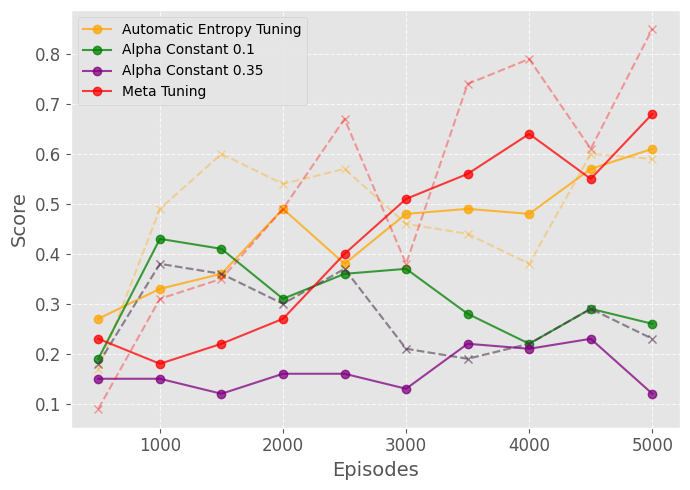

In [15]:
# Test the function with the current uploaded files
plot_agent_performance(
    agent_files=[
        ('./csv/AET_strong_won.csv', './csv/AET_weak_won.csv'),
        ('./csv/C0.1_strong_won.csv', './csv/C0.1_weak_won.csv'),
        ('./csv/C0.35_strong_won.csv', './csv/C0.1_weak_won.csv'),
        ('./csv/meta_strong_won.csv', './csv/meta_weak_won.csv'),
        ],
    agent_labels=[
        'Automatic Entropy Tuning',
        'Alpha Constant 0.1',
        'Alpha Constant 0.35',
        'Meta Tuning',
        ],
    title="Alpha Tuning vs Entropy Tuning vs No Tuning"
)

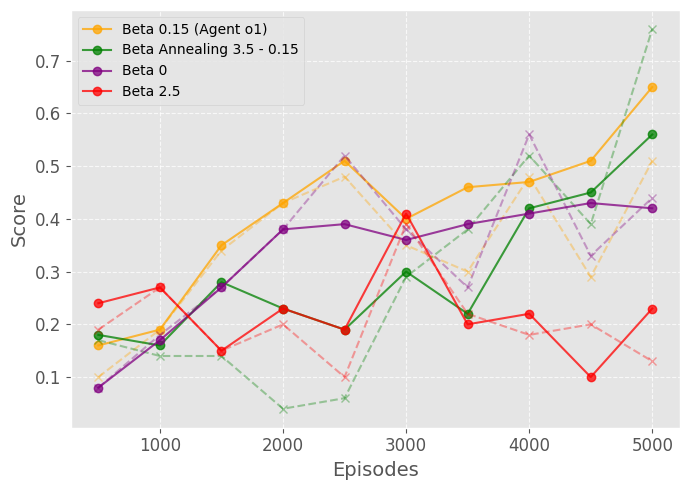

In [16]:
# Test the function with the current uploaded files
plot_agent_performance(
    agent_files=[
        ('./csv/rnd_0.15_strong_won.csv', './csv/rnd_0.15_weak_won.csv'),
        ('./csv/rnd_3.5_0.15_strong_won.csv', './csv/rnd_3.5_0.15_weak_won.csv'),
        ('./csv/rnd_0_strong_won.csv', './csv/rnd_0_weak_won.csv'),
        ('./csv/rnd_2.5_strong_won.csv', './csv/rnd_2.5_weak_won.csv'),
        ],
    agent_labels=[
        'Beta 0.15 (Agent o1)',
        'Beta Annealing 3.5 - 0.15',
        'Beta 0',
        'Beta 2.5',
        ],
    title="RND Network performance" 
)

### Iterative Agent Training


In [17]:
def plot_stacked_agent_performance(agent_files, agent_labels, title):
    plt.figure(figsize=(11, 8))
    plt.style.use('ggplot')
    
    colors = ['orange', 'green', 'purple', 'red', 'blue']
    x_position = 0

    for idx, (strong_file, weak_file) in enumerate(agent_files):
        strong_df = pd.read_csv(strong_file, header=None, names=['Score'])
        weak_df = pd.read_csv(weak_file, header=None, names=['Score'])
        
        x_ticks_strong = (strong_df.index + 1) * 500 + x_position
        x_ticks_weak = (weak_df.index + 1) * 500 + x_position
        
        plt.plot(x_ticks_strong, strong_df['Score'], label=f'{agent_labels[idx]}', 
                 color=colors[idx % len(colors)], linestyle='-', marker='o', alpha=0.75)
        plt.plot(x_ticks_weak, weak_df['Score'], 
                 color=colors[idx % len(colors)], linestyle='--', marker='x', alpha=0.35)
        
        x_position += len(strong_df) * 500

    # Add a single legend entry for weak performance
    plt.plot([], [], linestyle='--', marker='x', color='black', alpha=0.6, label="-- weak bot (color coded)")
 

    #plt.title(title, fontsize=16)
    plt.xlabel('Cumulative Episodes', fontsize=14)
    plt.ylabel('Score', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    
    # Remove excess margins
    #plt.margins(0)
    plt.gca().set_position([0, 0, 1, 1])
    
    # Tight layout and save
    plt.tight_layout()
    plt.savefig('./output_graphics/stacked_performance.pdf', bbox_inches='tight')
    plt.savefig('./output_graphics/stacked_performance.png', bbox_inches='tight')

    plt.show()


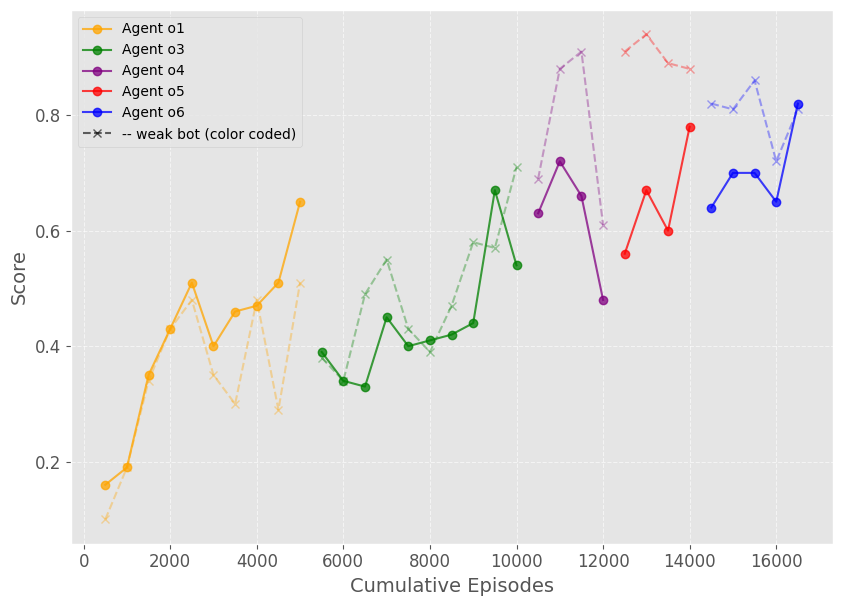

In [18]:
# Test the function with the current uploaded files
plot_stacked_agent_performance(
    agent_files=[
        ('./csv/rnd_0.15_strong_won.csv', './csv/rnd_0.15_weak_won.csv'),
        ('./csv/iter_agent_o3_strong_won.csv', './csv/iter_agent_o3_weak_won.csv'),
        ('./csv/iter_agent_o4_strong_won.csv', './csv/iter_agent_o4_weak_won.csv'),
        ('./csv/iter_agent_o5_strong_won.csv', './csv/iter_agent_o5_weak_won.csv'),
        ('./csv/iter_agent_o6_strong_won.csv', './csv/iter_agent_o6_weak_won.csv'),
        ],
    agent_labels=[
        'Agent o1',
        'Agent o3',
        'Agent o4',
        'Agent o5',
        'Agent o6',
        ],
    title="Iterative Agent Process"
)